In [1]:
# Run this cell
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from ipynb.fs.full.preprocessing import readFile
X_train, X_test, y_train, y_test, df, df_train, cols = readFile()

In [2]:
# display features and first few rows of data
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6,7.0
1,6.6,0.70,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,5.0
2,6.8,0.56,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0,6.0
3,7.4,0.68,0.16,1.8,0.078,12.0,39.0,0.99770,3.50,0.70,9.9,6.0
4,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,5.0


In [3]:
# display number of features and number of data entries
df_train.info()
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1087 non-null   float64
 1   volatile acidity      1087 non-null   float64
 2   citric acid           1087 non-null   float64
 3   residual sugar        1087 non-null   float64
 4   chlorides             1087 non-null   float64
 5   free sulfur dioxide   1087 non-null   float64
 6   total sulfur dioxide  1087 non-null   float64
 7   density               1087 non-null   float64
 8   pH                    1087 non-null   float64
 9   sulphates             1087 non-null   float64
 10  alcohol               1087 non-null   float64
 11  quality               1087 non-null   float64
dtypes: float64(12)
memory usage: 102.0 KB
X_train Shape:  (1087, 11)
y_train Shape:  (1087,)


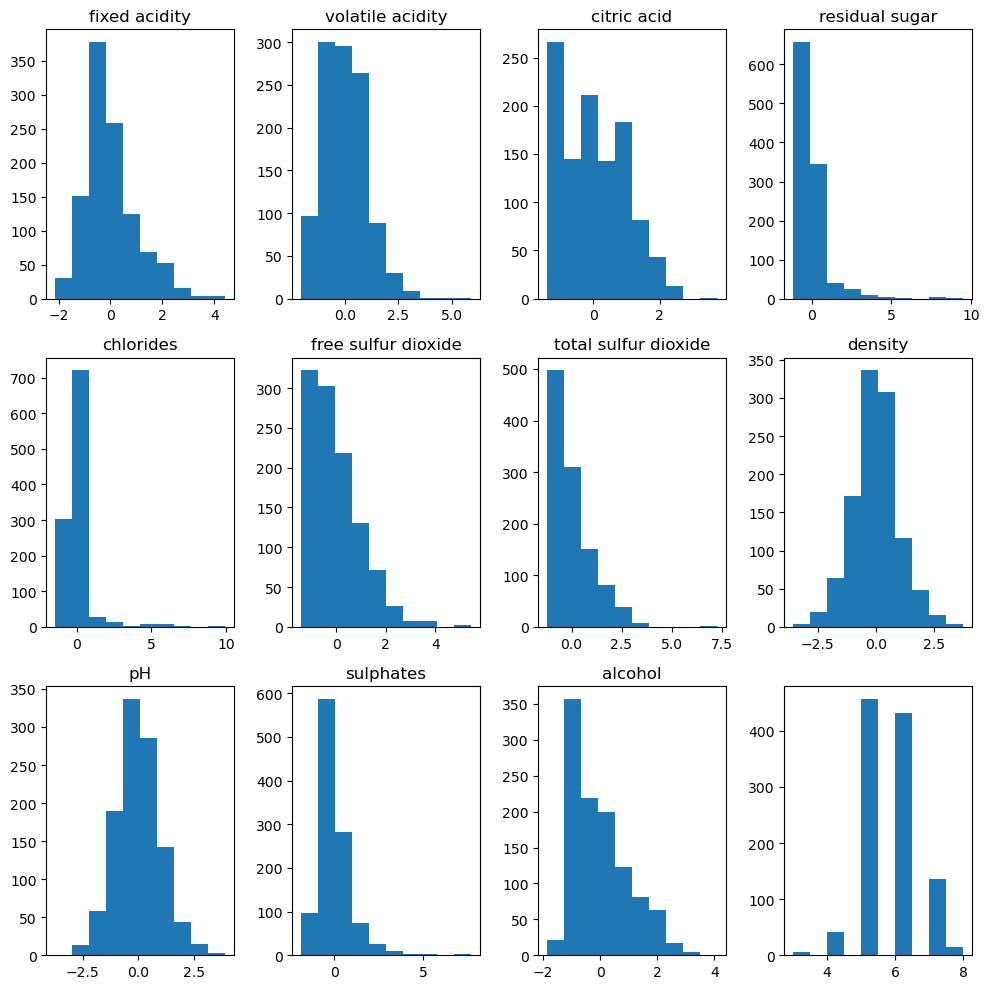

In [4]:
# display correlation between individual features and resulting quality
fig, axs = plt.subplots(3, 4, figsize=(10,10))

for i in range(3):
    for j in range(4):
        if (i*4+j < X_train.shape[1]):
            axs[i, j].hist(X_train[:, i*4+j])
            axs[i, j].set_title(cols[i*4+j])
axs[2,3].hist(y_train)
fig.tight_layout()

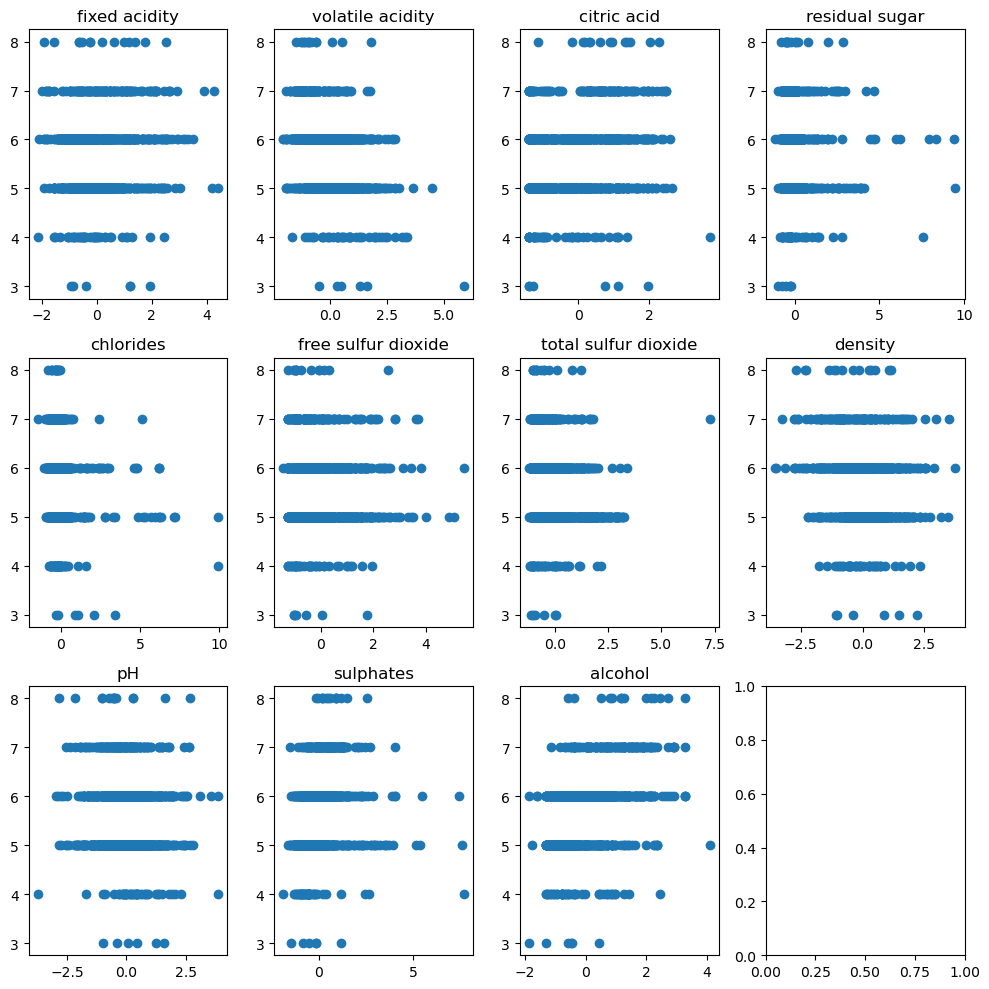

In [5]:
# display correlation between individual features and resulting quality
fig, axs = plt.subplots(3, 4, figsize=(10,10)) 

for i in range(3):
    for j in range(4):
        if (i*4+j < X_train.shape[1]):
            axs[i, j].scatter(X_train[:, i*4+j], y_train)
            axs[i, j].set_title(cols[i*4+j])
fig.tight_layout()

In [6]:
# calculate R^2 of all features
corrs = df_train.corr()['quality'][0:11]
print(corrs)

corrs.sort_values(key=lambda x: abs(x), ascending=False) # Sort by absolute value

fixed acidity           0.123708
volatile acidity       -0.376871
citric acid             0.220401
residual sugar          0.019455
chlorides              -0.132771
free sulfur dioxide    -0.055947
total sulfur dioxide   -0.202667
density                -0.171496
pH                     -0.069031
sulphates               0.224952
alcohol                 0.475633
Name: quality, dtype: float64


alcohol                 0.475633
volatile acidity       -0.376871
sulphates               0.224952
citric acid             0.220401
total sulfur dioxide   -0.202667
density                -0.171496
chlorides              -0.132771
fixed acidity           0.123708
pH                     -0.069031
free sulfur dioxide    -0.055947
residual sugar          0.019455
Name: quality, dtype: float64